<font color='black'>
Content:

1. [VGG16](#1) 
2. [VGG19](#2)
3. [MobileNet](#3)
4. [MobileNetV2](#4)
5. [ResNet50](#5) 
6. [ResNet101](#6)  
7. [DenseNet169](#7)     
8. [DenesNet121](#8) 
9. [InceptionV3](#9)
10. [Model Comparison](#10)    

In [155]:


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [156]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import warnings
# filter warnings
warnings.filterwarnings('ignore')
import os

In [157]:
import tensorflow as tf
import scipy
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [158]:
import random
seed_value = 42  # Başlangıçta kullanılacak rastgele tohum değeri
random.seed(seed_value)

In [159]:
!pip install split-folders

import splitfolders
splitfolders.ratio("/kaggle/input/brain-tumor-classification-mri/Training/","/kaggle/working/output",ratio=(0.9,0.1))

Copying files: 2870 files [00:03, 839.67 files/s] 


In [160]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img
from glob import glob
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Input,GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint


from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import InceptionV3

In [161]:
train_path="/kaggle/working/output/train/"
val_path="/kaggle/working/output/val/"
test_path="/kaggle/input/brain-tumor-classification-mri/Testing/"

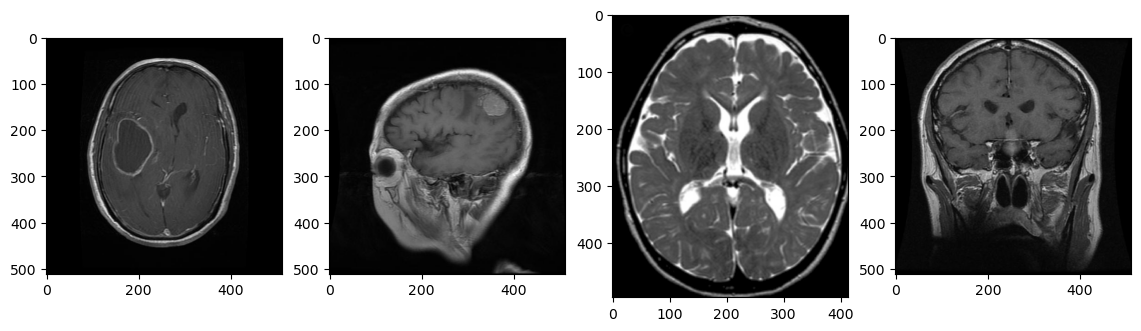

In [162]:
img=[load_img(train_path+'glioma_tumor/gg (514).jpg'),
load_img(train_path+'meningioma_tumor/m3 (121).jpg'),
load_img(train_path+'no_tumor/image(323).jpg'),
load_img(train_path+'pituitary_tumor/p (82).jpg')]

plt.figure(figsize=(14,14))
x, y = 1, 4 
for i in range(4):  
    plt.subplot(x, y, i+1)
    plt.imshow(img[i], cmap='gray')
plt.show()

In [163]:
for i in range(4):
    x=img_to_array(img[i])
    print(x.shape)

(512, 512, 3)
(512, 512, 3)
(496, 414, 3)
(512, 512, 3)


In [164]:
#Class isimlerini ve sayısını bulduk.
className=glob(train_path+"/*")
numberOfClass=len(className)
print("number of class:",numberOfClass)

number of class: 4


In [165]:
batch_size=16

In [166]:
#Data Generation -Train-Test
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.3,
                                horizontal_flip=True,
                                zoom_range=0.3)

test_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)

validation_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="rgb"
)

train_generator=train_datagen.flow_from_directory(
        train_path,
        target_size=(224,224),
        batch_size=batch_size,
        class_mode="categorical",
        color_mode="rgb")
test_generator=test_datagen.flow_from_directory(
        test_path,
        target_size=(224,224),
        batch_size=batch_size,
        class_mode="categorical",
        color_mode="rgb")

Found 289 images belonging to 4 classes.
Found 2581 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


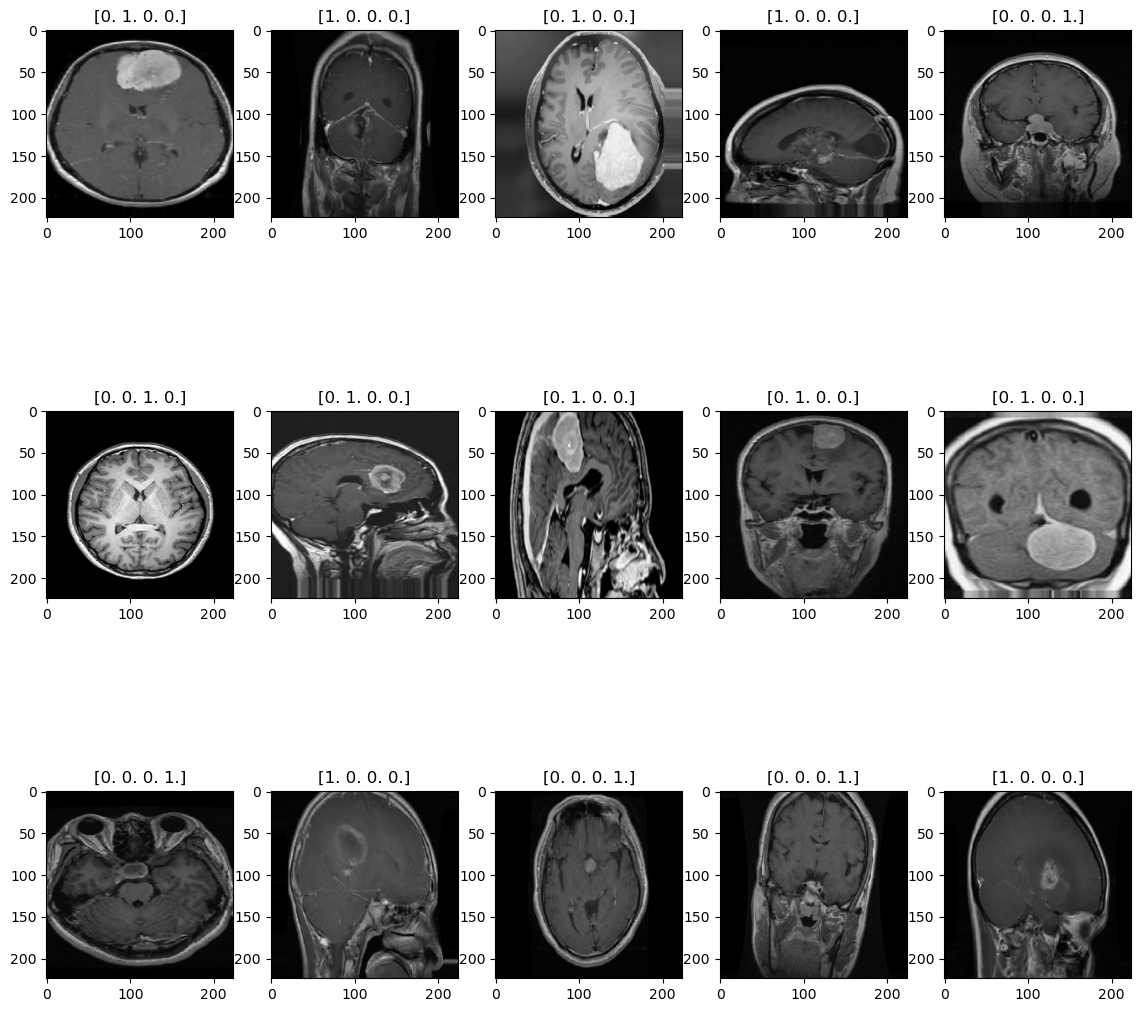

In [167]:
batch_1_img = train_generator[0]
plt.figure(figsize=(14,14))
x, y = 3, 5 
for i in range(15):  
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    plt.subplot(x, y, i+1)
    plt.imshow(img)
    plt.title(lab)
plt.show()

<a id="1"></a><br>
# VGG16

In [168]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))

for layer in vgg16.layers:
    layer.trainable = False

x = Flatten()(vgg16.output)
out = Dense(4, activation='softmax')(x)

# Yeni modeli oluşturun
model = Model(inputs=vgg16.input, outputs=out)
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [169]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [170]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
161/161 [==============================] - 33s 199ms/step - loss: 29.0517 - accuracy: 0.5045 - val_loss: 1.3867 - val_accuracy: 0.6007
Epoch 2/40
161/161 [==============================] - 32s 198ms/step - loss: 485.7720 - accuracy: 0.4674 - val_loss: 13.4990 - val_accuracy: 0.5208
Epoch 3/40
161/161 [==============================] - 33s 205ms/step - loss: 229.2275 - accuracy: 0.4343 - val_loss: 6.8004 - val_accuracy: 0.5486
Epoch 4/40
161/161 [==============================] - 32s 199ms/step - loss: 533.1498 - accuracy: 0.2908 - val_loss: 24.7101 - val_accuracy: 0.2917
Epoch 5/40
161/161 [==============================] - 32s 199ms/step - loss: 1163.2552 - accuracy: 0.3645 - val_loss: 28.0198 - val_accuracy: 0.2882
Epoch 6/40
161/161 [==============================] - 31s 194ms/step - loss: 861.3262 - accuracy: 0.3559 - val_loss: 20.2899 - val_accuracy: 0.3125
Epoch 7/40
161/161 [==============================] - 32s 196ms/step - loss: 470.7418 - accuracy: 0.3462 - val_los

In [171]:
loss16, accuracy16 = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss16)
print("Test Accuracy:", accuracy16)

3/3 [==============================] - 0s 62ms/step - loss: 16.5017 - accuracy: 0.3750
Test Loss: 16.501697540283203
Test Accuracy: 0.375


<a id="2"></a><br>
# VGG19

In [172]:
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))

for layer in vgg19.layers:
    layer.trainable = False

x = Flatten()(vgg19.output)
out = Dense(4, activation='softmax')(x)

# Yeni modeli oluşturun
model = Model(inputs=vgg19.input, outputs=out)



In [173]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]


model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [174]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
161/161 [==============================] - 33s 199ms/step - loss: 2515.0837 - accuracy: 0.5626 - val_loss: 18.0239 - val_accuracy: 0.6319
Epoch 2/40
161/161 [==============================] - 32s 199ms/step - loss: 18027.4414 - accuracy: 0.4090 - val_loss: 35.7749 - val_accuracy: 0.4132
Epoch 3/40
161/161 [==============================] - 33s 202ms/step - loss: 23409.0176 - accuracy: 0.2565 - val_loss: 100.6544 - val_accuracy: 0.1389
Epoch 4/40
161/161 [==============================] - 32s 201ms/step - loss: 35807.5273 - accuracy: 0.2612 - val_loss: 54.0626 - val_accuracy: 0.2882
Epoch 5/40
161/161 [==============================] - 32s 199ms/step - loss: 19249.3477 - accuracy: 0.2881 - val_loss: 31.0363 - val_accuracy: 0.3889
Epoch 6/40
161/161 [==============================] - 33s 204ms/step - loss: 10120.3691 - accuracy: 0.3532 - val_loss: 55.2313 - val_accuracy: 0.1389
Epoch 7/40
161/161 [==============================] - 32s 201ms/step - loss: 22090.2012 - accuracy: 

In [175]:
loss19, accuracy19 = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss19)
print("Test Accuracy:", accuracy19)

3/3 [==============================] - 0s 67ms/step - loss: 36.6542 - accuracy: 0.2083
Test Loss: 36.654232025146484
Test Accuracy: 0.2083333283662796


<a id="3"></a><br>
# MobileNet

In [176]:
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224, 3))

for layer in mobilenet.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(mobilenet.output)
out = Dense(4, activation='softmax')(x)

model = Model(inputs=mobilenet.input, outputs=out)



In [177]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [178]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
161/161 [==============================] - 33s 192ms/step - loss: 0.7883 - accuracy: 0.6821 - val_loss: 0.4856 - val_accuracy: 0.8264
Epoch 2/40
161/161 [==============================] - 30s 188ms/step - loss: 0.4539 - accuracy: 0.8320 - val_loss: 0.5627 - val_accuracy: 0.7639
Epoch 3/40
161/161 [==============================] - 31s 190ms/step - loss: 0.3780 - accuracy: 0.8558 - val_loss: 0.5031 - val_accuracy: 0.7778
Epoch 4/40
161/161 [==============================] - 31s 191ms/step - loss: 0.3484 - accuracy: 0.8635 - val_loss: 0.4262 - val_accuracy: 0.8403
Epoch 5/40
161/161 [==============================] - 31s 191ms/step - loss: 0.3097 - accuracy: 0.8838 - val_loss: 0.3609 - val_accuracy: 0.8785
Epoch 6/40
161/161 [==============================] - 31s 190ms/step - loss: 0.2925 - accuracy: 0.8897 - val_loss: 0.3583 - val_accuracy: 0.8681
Epoch 7/40
161/161 [==============================] - 31s 190ms/step - loss: 0.2610 - accuracy: 0.9037 - val_loss: 0.2577 - val_ac

In [179]:
loss_mob, accuracy_mob = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss_mob)
print("Test Accuracy:", accuracy_mob)

3/3 [==============================] - 0s 56ms/step - loss: 0.9408 - accuracy: 0.8125
Test Loss: 0.9408428072929382
Test Accuracy: 0.8125


<a id="4"></a><br>
# MobileNetV2

In [180]:

mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224, 3))

for layer in mobilenetv2.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(mobilenetv2.output)
out = Dense(4, activation='softmax')(x)

model = Model(inputs=mobilenetv2.input, outputs=out)


9406464/9406464 [==============================] - 1s 0us/step


In [181]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [182]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
161/161 [==============================] - 35s 194ms/step - loss: 0.7417 - accuracy: 0.7064 - val_loss: 0.5352 - val_accuracy: 0.7951
Epoch 2/40
161/161 [==============================] - 31s 190ms/step - loss: 0.4858 - accuracy: 0.8207 - val_loss: 0.4825 - val_accuracy: 0.8021
Epoch 3/40
161/161 [==============================] - 30s 189ms/step - loss: 0.4296 - accuracy: 0.8483 - val_loss: 0.5423 - val_accuracy: 0.7812
Epoch 4/40
161/161 [==============================] - 31s 189ms/step - loss: 0.3878 - accuracy: 0.8608 - val_loss: 0.4410 - val_accuracy: 0.8368
Epoch 5/40
161/161 [==============================] - 30s 186ms/step - loss: 0.3870 - accuracy: 0.8612 - val_loss: 0.4370 - val_accuracy: 0.8194
Epoch 6/40
161/161 [==============================] - 31s 189ms/step - loss: 0.3606 - accuracy: 0.8710 - val_loss: 0.5013 - val_accuracy: 0.7986
Epoch 7/40
161/161 [==============================] - 31s 191ms/step - loss: 0.3159 - accuracy: 0.8834 - val_loss: 0.4118 - val_ac

In [183]:
loss_mobv2, accuracy_mobv2 = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss_mobv2)
print("Test Accuracy:", accuracy_mobv2)

3/3 [==============================] - 0s 77ms/step - loss: 0.9738 - accuracy: 0.7292
Test Loss: 0.9738181233406067
Test Accuracy: 0.7291666865348816


<a id="5"></a><br>
# ResNet50

In [184]:
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in resnet50.layers:
    layer.trainable = False
x = Flatten()(resnet50.output)
out = Dense(4, activation='softmax')(x)

model = Model(inputs=resnet50.input, outputs=out)


In [185]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [186]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
161/161 [==============================] - 37s 210ms/step - loss: 2.4098 - accuracy: 0.4347 - val_loss: 1.3513 - val_accuracy: 0.6146
Epoch 2/40
161/161 [==============================] - 31s 195ms/step - loss: 2.0281 - accuracy: 0.4620 - val_loss: 1.2741 - val_accuracy: 0.5729
Epoch 3/40
161/161 [==============================] - 32s 198ms/step - loss: 1.4783 - accuracy: 0.5201 - val_loss: 0.7948 - val_accuracy: 0.6806
Epoch 4/40
161/161 [==============================] - 32s 198ms/step - loss: 1.4014 - accuracy: 0.5493 - val_loss: 1.2294 - val_accuracy: 0.5903
Epoch 5/40
161/161 [==============================] - 32s 197ms/step - loss: 1.5633 - accuracy: 0.5290 - val_loss: 1.6591 - val_accuracy: 0.4965
Epoch 6/40
161/161 [==============================] - 31s 195ms/step - loss: 1.4334 - accuracy: 0.5598 - val_loss: 1.8469 - val_accuracy: 0.6076
Epoch 7/40
161/161 [==============================] - 32s 199ms/step - loss: 1.4915 - accuracy: 0.5602 - val_loss: 3.2205 - val_ac

In [187]:
loss_res50, accuracy_res50 = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss_res50)
print("Test Accuracy:", accuracy_res50)

3/3 [==============================] - 0s 63ms/step - loss: 4.1717 - accuracy: 0.4792
Test Loss: 4.171698093414307
Test Accuracy: 0.4791666567325592


<a id="6"></a><br>
# ResNet101

In [188]:
resnet101 = ResNet101(weights='imagenet', include_top=False, input_shape=(224,224,3))

for layer in resnet101.layers:
    layer.trainable = False
x = Flatten()(resnet101.output)
out = Dense(4, activation='softmax')(x)

model = Model(inputs=resnet101.input, outputs=out)



171446536/171446536 [==============================] - 6s 0us/step


In [189]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [190]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
161/161 [==============================] - 42s 221ms/step - loss: 1.9563 - accuracy: 0.4589 - val_loss: 1.4334 - val_accuracy: 0.5799
Epoch 2/40
161/161 [==============================] - 34s 209ms/step - loss: 1.3702 - accuracy: 0.5306 - val_loss: 1.1054 - val_accuracy: 0.5868
Epoch 3/40
161/161 [==============================] - 33s 207ms/step - loss: 1.4266 - accuracy: 0.5318 - val_loss: 0.9495 - val_accuracy: 0.6562
Epoch 4/40
161/161 [==============================] - 34s 209ms/step - loss: 1.4704 - accuracy: 0.5567 - val_loss: 1.3260 - val_accuracy: 0.6285
Epoch 5/40
161/161 [==============================] - 34s 209ms/step - loss: 1.2244 - accuracy: 0.5875 - val_loss: 0.9701 - val_accuracy: 0.6840
Epoch 6/40
161/161 [==============================] - 34s 210ms/step - loss: 1.2276 - accuracy: 0.6008 - val_loss: 1.5987 - val_accuracy: 0.5382
Epoch 7/40
161/161 [==============================] - 33s 206ms/step - loss: 1.2860 - accuracy: 0.6121 - val_loss: 1.3707 - val_ac

In [191]:
loss_res101, accuracy_res101 = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss_res101)
print("Test Accuracy:", accuracy_res101)

3/3 [==============================] - 0s 76ms/step - loss: 7.4012 - accuracy: 0.5625
Test Loss: 7.401197910308838
Test Accuracy: 0.5625


<a id="7"></a><br>
# DenseNet169

In [192]:
densenet169 = DenseNet169(weights='imagenet', include_top=False, input_shape=(224,224, 3))


for layer in densenet169.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(densenet169.output)
out = Dense(4, activation='softmax')(x)

model = Model(inputs=densenet169.input, outputs=out)


51877672/51877672 [==============================] - 2s 0us/step


In [193]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [194]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
161/161 [==============================] - 48s 228ms/step - loss: 0.8905 - accuracy: 0.6417 - val_loss: 0.5483 - val_accuracy: 0.8299
Epoch 2/40
161/161 [==============================] - 33s 202ms/step - loss: 0.5567 - accuracy: 0.8023 - val_loss: 0.4552 - val_accuracy: 0.8611
Epoch 3/40
161/161 [==============================] - 33s 202ms/step - loss: 0.4640 - accuracy: 0.8311 - val_loss: 0.3938 - val_accuracy: 0.8681
Epoch 4/40
161/161 [==============================] - 33s 205ms/step - loss: 0.4088 - accuracy: 0.8600 - val_loss: 0.4118 - val_accuracy: 0.8438
Epoch 5/40
161/161 [==============================] - 34s 208ms/step - loss: 0.4000 - accuracy: 0.8604 - val_loss: 0.3310 - val_accuracy: 0.8924
Epoch 6/40
161/161 [==============================] - 34s 211ms/step - loss: 0.3622 - accuracy: 0.8694 - val_loss: 0.3727 - val_accuracy: 0.8576
Epoch 7/40
161/161 [==============================] - 33s 206ms/step - loss: 0.3519 - accuracy: 0.8745 - val_loss: 0.3186 - val_ac

In [195]:
loss_den169, accuracy_den169 = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss_den169)
print("Test Accuracy:", accuracy_den169)

3/3 [==============================] - 0s 80ms/step - loss: 1.0024 - accuracy: 0.7083
Test Loss: 1.0024464130401611
Test Accuracy: 0.7083333134651184


<a id="8"></a><br>
# DenseNet121

In [196]:
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224, 3))


for layer in densenet121.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(densenet121.output)
out = Dense(4, activation='softmax')(x)

model = Model(inputs=densenet121.input, outputs=out)

29084464/29084464 [==============================] - 1s 0us/step


In [197]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [198]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
161/161 [==============================] - 40s 208ms/step - loss: 0.9219 - accuracy: 0.6234 - val_loss: 0.6704 - val_accuracy: 0.7222
Epoch 2/40
161/161 [==============================] - 32s 198ms/step - loss: 0.5976 - accuracy: 0.7774 - val_loss: 0.5443 - val_accuracy: 0.7917
Epoch 3/40
161/161 [==============================] - 32s 196ms/step - loss: 0.5122 - accuracy: 0.8172 - val_loss: 0.4869 - val_accuracy: 0.8125
Epoch 4/40
161/161 [==============================] - 31s 194ms/step - loss: 0.4729 - accuracy: 0.8296 - val_loss: 0.5063 - val_accuracy: 0.8056
Epoch 5/40
161/161 [==============================] - 32s 197ms/step - loss: 0.4404 - accuracy: 0.8421 - val_loss: 0.4018 - val_accuracy: 0.8576
Epoch 6/40
161/161 [==============================] - 32s 197ms/step - loss: 0.4255 - accuracy: 0.8429 - val_loss: 0.4205 - val_accuracy: 0.8403
Epoch 7/40
161/161 [==============================] - 33s 202ms/step - loss: 0.3971 - accuracy: 0.8577 - val_loss: 0.4488 - val_ac

In [199]:
loss_den121, accuracy_den121 = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss_den121)
print("Test Accuracy:", accuracy_den121)

3/3 [==============================] - 0s 73ms/step - loss: 1.2587 - accuracy: 0.6458
Test Loss: 1.2587265968322754
Test Accuracy: 0.6458333134651184


<a id="9"></a><br>
# InceptionV3

In [200]:
inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224, 3))

for layer in inceptionv3.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(inceptionv3.output)
out = Dense(4, activation='softmax')(x)

model = Model(inputs=inceptionv3.input, outputs=out)

87910968/87910968 [==============================] - 3s 0us/step


In [201]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [202]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
161/161 [==============================] - 39s 207ms/step - loss: 0.7947 - accuracy: 0.6643 - val_loss: 0.6426 - val_accuracy: 0.7431
Epoch 2/40
161/161 [==============================] - 32s 196ms/step - loss: 0.5889 - accuracy: 0.7641 - val_loss: 0.4671 - val_accuracy: 0.8403
Epoch 3/40
161/161 [==============================] - 32s 197ms/step - loss: 0.5030 - accuracy: 0.8109 - val_loss: 0.4399 - val_accuracy: 0.8299
Epoch 4/40
161/161 [==============================] - 33s 203ms/step - loss: 0.4698 - accuracy: 0.8199 - val_loss: 0.4019 - val_accuracy: 0.8646
Epoch 5/40
161/161 [==============================] - 32s 197ms/step - loss: 0.4334 - accuracy: 0.8386 - val_loss: 0.3846 - val_accuracy: 0.8785
Epoch 6/40
161/161 [==============================] - 32s 198ms/step - loss: 0.3979 - accuracy: 0.8503 - val_loss: 0.4045 - val_accuracy: 0.8403
Epoch 7/40
161/161 [==============================] - 31s 191ms/step - loss: 0.4025 - accuracy: 0.8503 - val_loss: 0.3671 - val_ac

In [203]:
loss_incep, accuracy_incep = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss_incep)
print("Test Accuracy:", accuracy_incep)

3/3 [==============================] - 0s 66ms/step - loss: 0.8940 - accuracy: 0.7292
Test Loss: 0.8939852118492126
Test Accuracy: 0.7291666865348816


<a id="10"></a><br>
# Model Comparison

         Model       Loss  Accuracy
0        VGG16  16.501698  0.375000
1        VGG19  36.654232  0.208333
2     MobilNet   0.940843  0.812500
3   MobilNetV2   0.973818  0.729167
4     ResNet50   4.171698  0.479167
5    ResNet101   7.401198  0.562500
6  DenseNet169   1.002446  0.708333
7  DenseNet121   1.258727  0.645833
8  InceptionV3   0.893985  0.729167


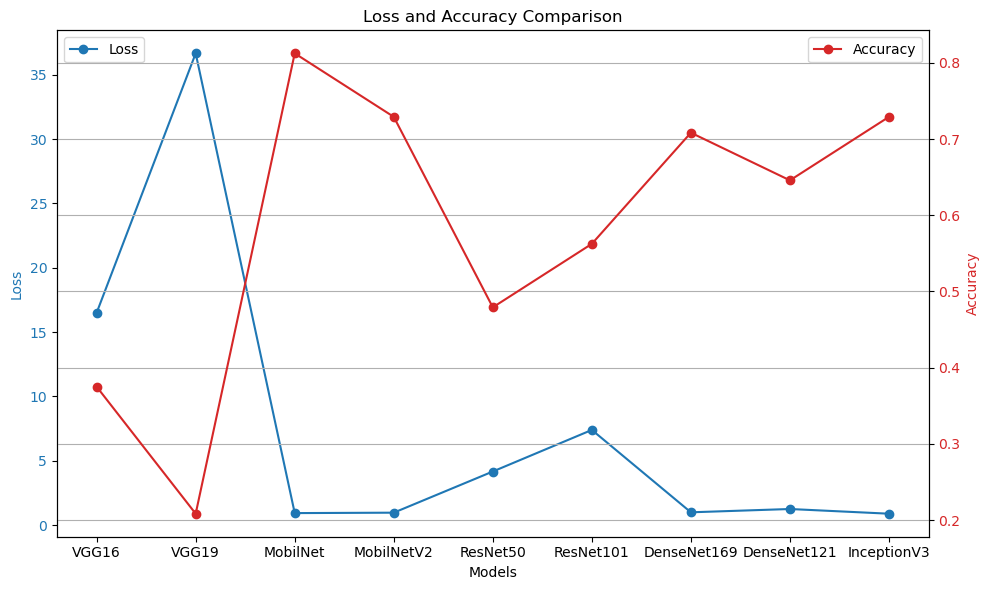

In [207]:

models = ['VGG16', 'VGG19', 'MobilNet', 'MobilNetV2', 'ResNet50', 'ResNet101', 'DenseNet169', 'DenseNet121', 'InceptionV3']
loss_values = [loss16, loss19, loss_mob, loss_mobv2, loss_res50, loss_res101, loss_den169,loss_den121,loss_incep]
accuracy_values = [accuracy16, accuracy19, accuracy_mob, accuracy_mobv2, accuracy_res50, accuracy_res101, accuracy_den169, accuracy_den121, accuracy_incep]

data = {'Model': models, 'Loss': loss_values, 'Accuracy': accuracy_values}
df = pd.DataFrame(data)

print(df)


fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('Loss', color=color)
ax1.plot(models, loss_values, marker='o', color=color, label='Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# İkinci ölçümü aynı grafikte göstermek için ikinci bir y eksen ekleyin
ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(models, accuracy_values, marker='o', color=color, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Loss and Accuracy Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()